### Import libraries

In [22]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [23]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [24]:
# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

## Load and Inspect Data

In [25]:
dataset_dir = 'dataset'
dataset = np.load(f'{dataset_dir}/public_data.npz', allow_pickle=True)
X = dataset['data']
y = dataset['labels']
labels = {0:'healthy', 1:'unhealthy'}

print(f'Dataset Data Shape {X.shape}, type = {X[0].dtype}')
print(f'Dataset Labels Shape {y.shape}')


Dataset Data Shape (5200, 96, 96, 3), type = float32
Dataset Labels Shape (5200,)


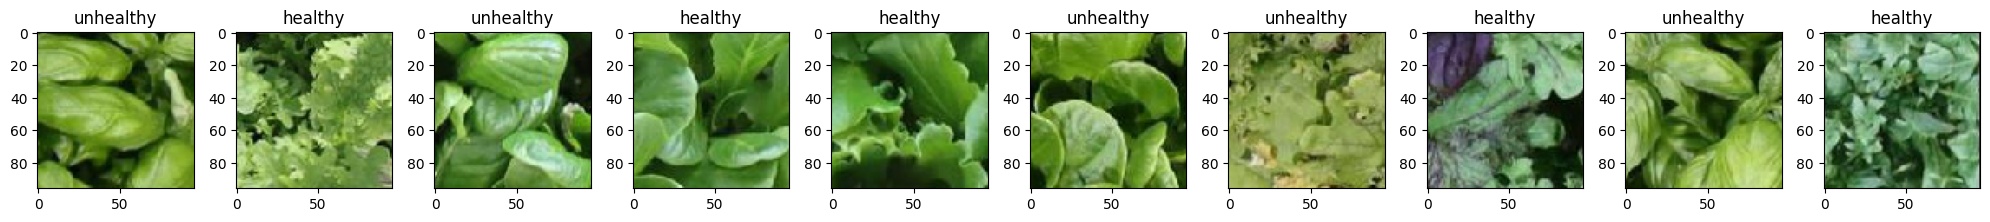

In [26]:
# Display a sample of images from the training-validation dataset
num_img = 10
to_show = np.random.randint(0, X.shape[0], num_img);
fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected number of images
for i in range(num_img):
    ax = axes[i]
    ax.imshow(X[to_show[i]]/255)
    ax.set_title('{}'.format(y[to_show[i]]))

# Adjust layout and display the images
plt.tight_layout()
plt.show()


In [27]:
# Display the count of occurrences of target classes in the training-validation dataset    
print('Counting occurrences of target classes:')
print(pd.DataFrame(y, columns=['class'])['class'].value_counts())

Counting occurrences of target classes:
healthy      3199
unhealthy    2001
Name: class, dtype: int64


### Inspection consideration
1. Labels are not balanced
2. Outliers on the dataset are present
3. Labels are not correctly formatted 'healthy' -> 0, 'unhealthy' -> 1
4. Dataset is not normalized

## Process data

### Labels encoding

In [28]:
encoding = {
    'healthy': 0,
    'unhealthy': 1,
}
y = tfk.utils.to_categorical([encoding.get(val, -1) for val in y],len(np.unique(y)))




### Dataset normalized

In [29]:
X = (X / 255).astype('float32')

### Outliers

In [30]:
outliers_idxs = np.load('outliers_idxs.npy')
mask = np.ones(len(X), dtype=bool)
mask[outliers_idxs] = False

X = X[mask]
y = y[mask]

In [34]:
np.savez('processed_data.npz', 
         X = X,
         y = y,
         )